In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')
subwayInfo = pd.read_csv("../data/subwayInfo.csv")
interestRate = pd.read_csv('../data/interestRate.csv')
schoolinfo = pd.read_csv('../data/schoolinfo.csv')

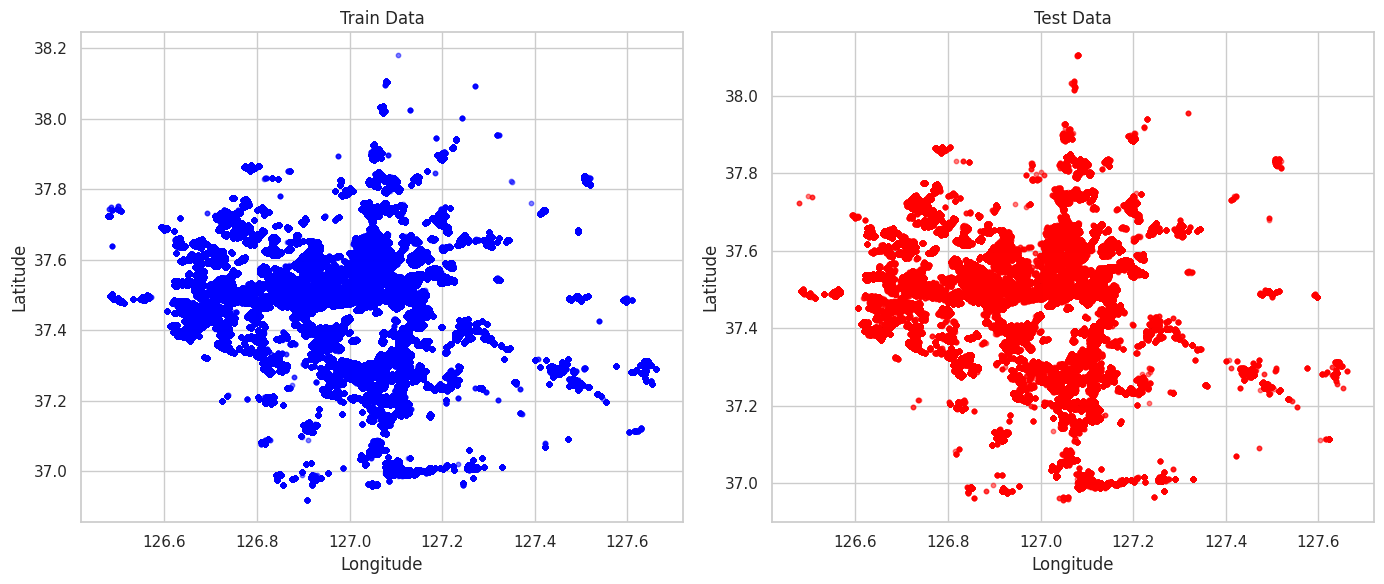

In [10]:
plt.figure(figsize=(14, 6))

# 훈련 데이터 산점도
plt.subplot(1, 2, 1)
plt.scatter(train_data['longitude'], train_data['latitude'], 
            color='blue', alpha=0.5, s=10)
plt.title('Train Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 테스트 데이터 산점도
plt.subplot(1, 2, 2)
plt.scatter(test_data['longitude'], test_data['latitude'], 
            color='red', alpha=0.5, s=10)
plt.title('Test Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 그래프 표시
plt.tight_layout()
plt.show()

In [9]:
train_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
count,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06
mean,9.006135e+05,7.518833e+01,2.021331e+05,1.589943e+01,1.203805e+00,1.005197e+01,2.004199e+03,3.747721e+01,1.269662e+02,1.706597e+01,3.816223e+04
std,5.199699e+05,2.552632e+01,1.352815e+02,8.625998e+00,8.852792e-01,6.973359e+00,1.115132e+01,1.625113e-01,1.701221e-01,1.112796e+01,2.610377e+04
min,0.000000e+00,1.032150e+01,2.019040e+05,1.000000e+00,0.000000e+00,-4.000000e+00,1.961000e+03,3.691791e+01,1.264787e+02,-3.000000e+00,3.000000e+02
25%,4.503068e+05,5.975000e+01,2.020080e+05,9.000000e+00,0.000000e+00,5.000000e+00,1.995000e+03,3.737976e+01,1.268422e+02,7.000000e+00,2.100000e+04
50%,9.006135e+05,7.715000e+01,2.021110e+05,1.600000e+01,2.000000e+00,9.000000e+00,2.004000e+03,3.750227e+01,1.269976e+02,1.700000e+01,3.200000e+04
75%,1.350920e+06,8.496000e+01,2.022120e+05,2.300000e+01,2.000000e+00,1.400000e+01,2.015000e+03,3.758205e+01,1.270888e+02,2.600000e+01,4.780000e+04
max,1.801227e+06,3.173600e+02,2.023120e+05,3.100000e+01,2.000000e+00,6.800000e+01,2.024000e+03,3.818194e+01,1.276609e+02,6.200000e+01,1.100000e+06


In [8]:
test_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age
count,150172.00000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000
mean,75085.50000,74.509956,202403.137576,14.816650,0.426071,10.060557,2004.908292,37.474571,126.967625,19.091708
std,43351.06665,23.971424,1.645994,8.537693,0.597423,6.982813,11.460352,0.166952,0.172066,11.460352
min,0.00000,10.780000,202401.000000,1.000000,0.000000,-3.000000,1966.000000,36.957089,126.478708,0.000000
25%,37542.75000,59.760000,202402.000000,7.000000,0.000000,5.000000,1995.000000,37.372616,126.841057,8.000000
50%,75085.50000,75.793700,202403.000000,15.000000,0.000000,9.000000,2004.000000,37.500382,126.998922,20.000000
75%,112628.25000,84.958200,202405.000000,22.000000,1.000000,14.000000,2016.000000,37.588872,127.091862,29.000000
max,150171.00000,273.860000,202406.000000,31.000000,2.000000,60.000000,2024.000000,38.106033,127.660896,58.000000


Calculating SSE:   0%|          | 0/99 [00:00<?, ?it/s]

Calculating SSE: 100%|██████████| 99/99 [11:08<00:00,  6.75s/it]


[99700.51305520469, 61739.3937666603, 35583.44003767219, 28718.03161093295, 25304.496833261663, 20892.799679513264, 18377.4353530628, 16534.34017335716, 15224.86070298927, 11491.16624154368, 10858.681966391907, 9906.021008635264, 8846.654402267466, 8023.362981324156, 7312.564132908156, 6961.631079910856, 6435.894638004272, 6102.351828776697, 5824.344090048103, 5397.981776582188, 4944.912643977808, 4764.457997405553, 4444.523785695753, 4146.223346541787, 4007.9045084118225, 3785.6313685626774, 3653.143946414528, 3371.7521857840984, 3172.6349584492177, 3073.9043810070157, 3002.9422226248826, 2884.3103237108508, 2786.8869330503003, 2719.6706779357546, 2590.0822941392457, 2530.812077310176, 2481.3640500861743, 2402.3245399315906, 2273.4334045234186, 2198.9673717939104, 2108.6326471419725, 2063.022576911136, 1998.6066232048538, 1936.2449794931788, 1887.777773568649, 1863.2134915199354, 1821.5579643176302, 1740.6863123740254, 1714.6957286207053, 1693.0566339638685, 1666.142263671309, 1623.18

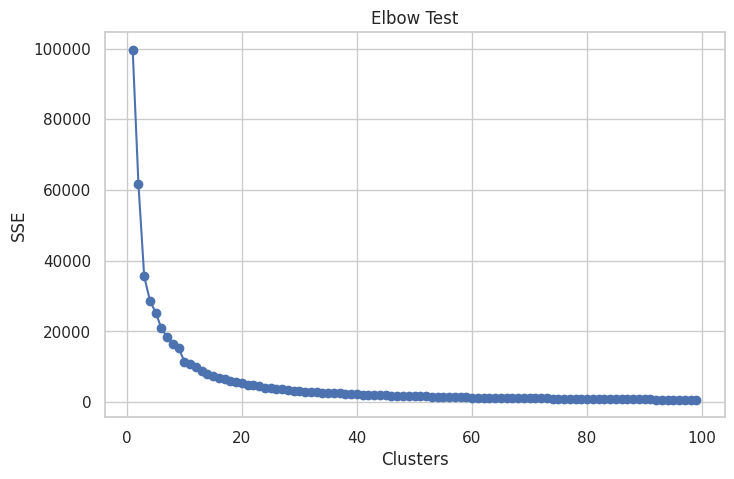

In [13]:
from sklearn.cluster import KMeans
from tqdm import tqdm

# 위도와 경도 데이터 추출
X = train_data[['latitude', 'longitude']]

# 클러스터 수 범위 설정
cluster_range = range(1, 100)
sse = []

# 각 클러스터 수에 대해 K-means 실행 및 SSE 계산
for k in tqdm(cluster_range, desc="Calculating SSE"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# SSE 결과 출력
print(sse)

# 그래프 스타일 설정
plt.figure(figsize=(8, 5))

# SSE 그래프 그리기
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Test')
plt.xlabel('Clusters')
plt.ylabel('SSE')

# 그래프 표시
plt.show()

/data/ephemeral/home/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


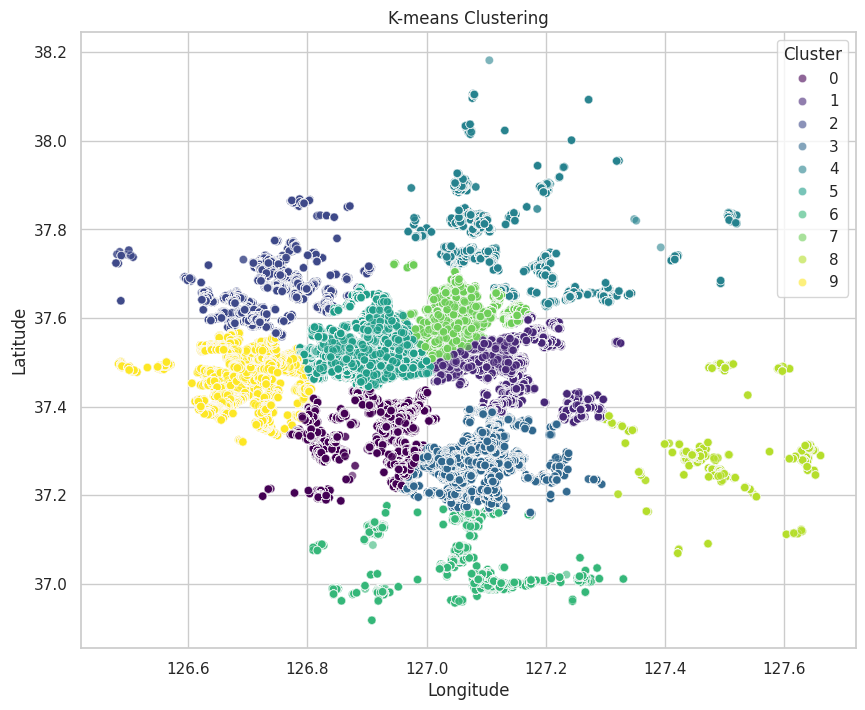

In [94]:
X = train_data[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=10, random_state=42)
train_data['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))

# 클러스터링 결과 산점도
sns.scatterplot(x='longitude', y='latitude', hue='cluster', 
                palette='viridis', data=train_data, legend='full', alpha=0.6)

plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(title='Cluster')
plt.show()

/tmp/ipykernel_530204/334527686.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/data/ephemeral/home/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


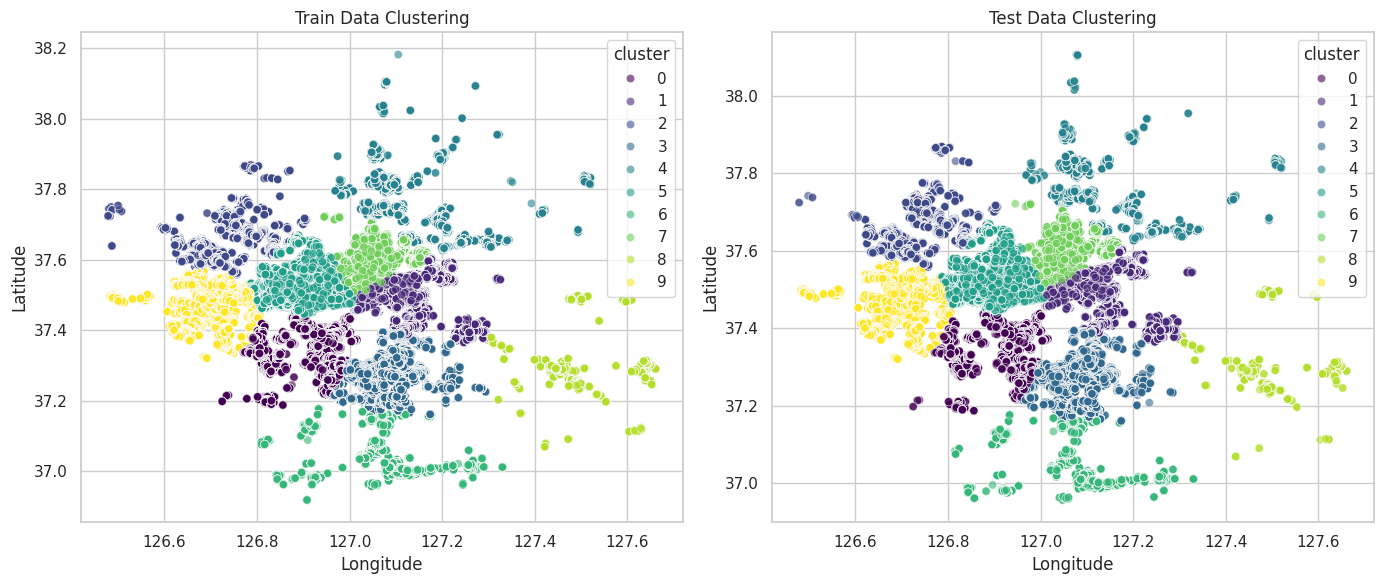

In [95]:
X_test = test_data[['latitude', 'longitude']]

test_data['cluster'] = kmeans.predict(X_test)

plt.figure(figsize=(14, 6))

# 훈련 데이터 산점도
plt.subplot(1, 2, 1)
sns.scatterplot(x='longitude', y='latitude', hue='cluster', 
                palette='viridis', data=train_data, legend='full', alpha=0.6)
plt.title('Train Data Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 테스트 데이터 산점도
plt.subplot(1, 2, 2)
sns.scatterplot(x='longitude', y='latitude', hue='cluster', 
                palette='viridis', data=test_data, legend='full', alpha=0.6)
plt.title('Test Data Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [96]:
test_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,cluster
count,150172.00000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000,150172.000000
mean,75085.50000,74.509956,202403.137576,14.816650,0.426071,10.060557,2004.908292,37.474571,126.967625,19.091708,4.179388
std,43351.06665,23.971424,1.645994,8.537693,0.597423,6.982813,11.460352,0.166952,0.172066,11.460352,2.825660
min,0.00000,10.780000,202401.000000,1.000000,0.000000,-3.000000,1966.000000,36.957089,126.478708,0.000000,0.000000
25%,37542.75000,59.760000,202402.000000,7.000000,0.000000,5.000000,1995.000000,37.372616,126.841057,8.000000,2.000000
50%,75085.50000,75.793700,202403.000000,15.000000,0.000000,9.000000,2004.000000,37.500382,126.998922,20.000000,4.000000
75%,112628.25000,84.958200,202405.000000,22.000000,1.000000,14.000000,2016.000000,37.588872,127.091862,29.000000,7.000000
max,150171.00000,273.860000,202406.000000,31.000000,2.000000,60.000000,2024.000000,38.106033,127.660896,58.000000,9.000000


In [35]:
unique_latitudes = train_data['latitude'].unique()
unique_longitudes = train_data['longitude'].unique()

print(len(unique_latitudes))
print(len(unique_longitudes))

18436
18447


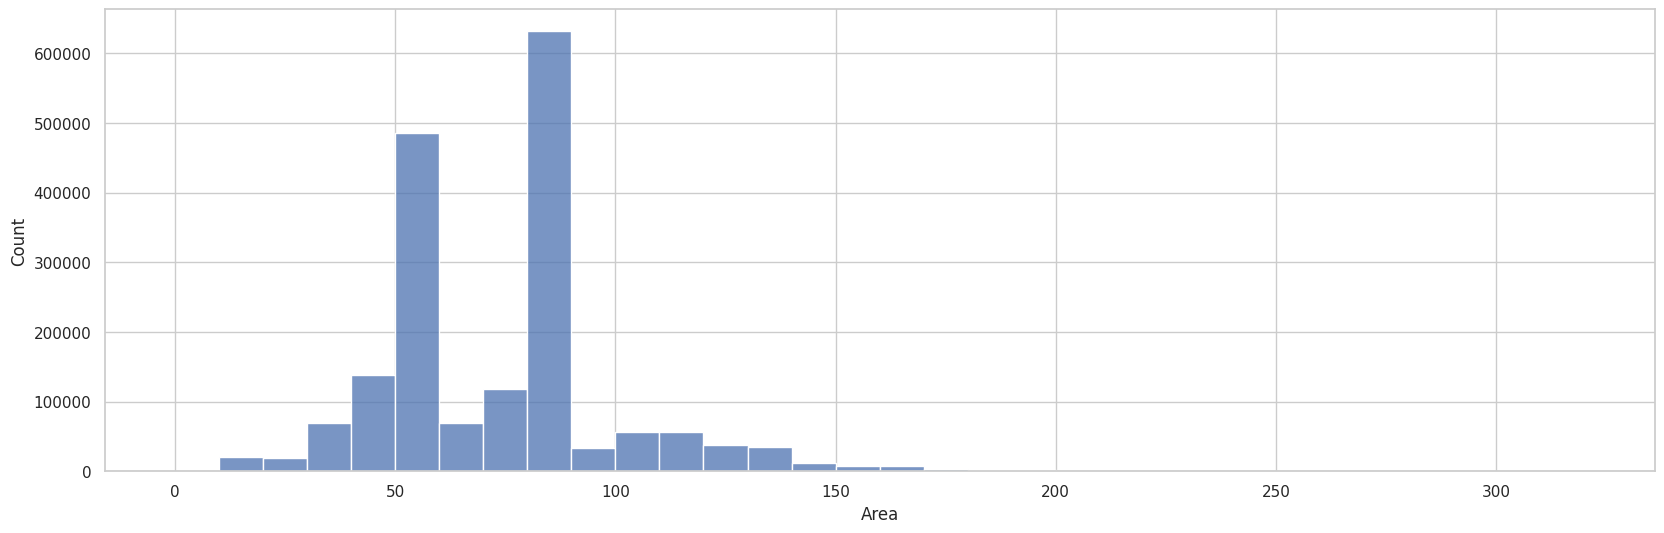

In [65]:
plt.figure(figsize=(20, 6))
sns.histplot(train_data['area_m2'], bins=range(0, int(train_data['area_m2'].max()) + 10, 10))
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

In [91]:
def categorize_area(x):
    range_start = (x // 50) * 50
    range_end = range_start + 49
    return f"{range_start} - {range_end}"

area_dummies = pd.get_dummies(train_data['area_m2'].apply(categorize_area), prefix='area',drop_first=True)

train_data = pd.concat([train_data, area_dummies], axis=1)

train_data.head()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,area_250.0 - 299.0,area_300.0 - 349.0,area_50.0 - 99.0,area_m2_category,area_100.0 - 149.0,area_150.0 - 199.0,area_200.0 - 249.0,area_250.0 - 299.0,area_300.0 - 349.0,area_50.0 - 99.0
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,...,0,0,1,50.0 - 99.0,False,False,False,False,False,True
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,...,0,0,1,50.0 - 99.0,False,False,False,False,False,True
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,...,0,0,1,50.0 - 99.0,False,False,False,False,False,True
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,...,0,0,1,50.0 - 99.0,False,False,False,False,False,True
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,...,0,0,1,50.0 - 99.0,False,False,False,False,False,True


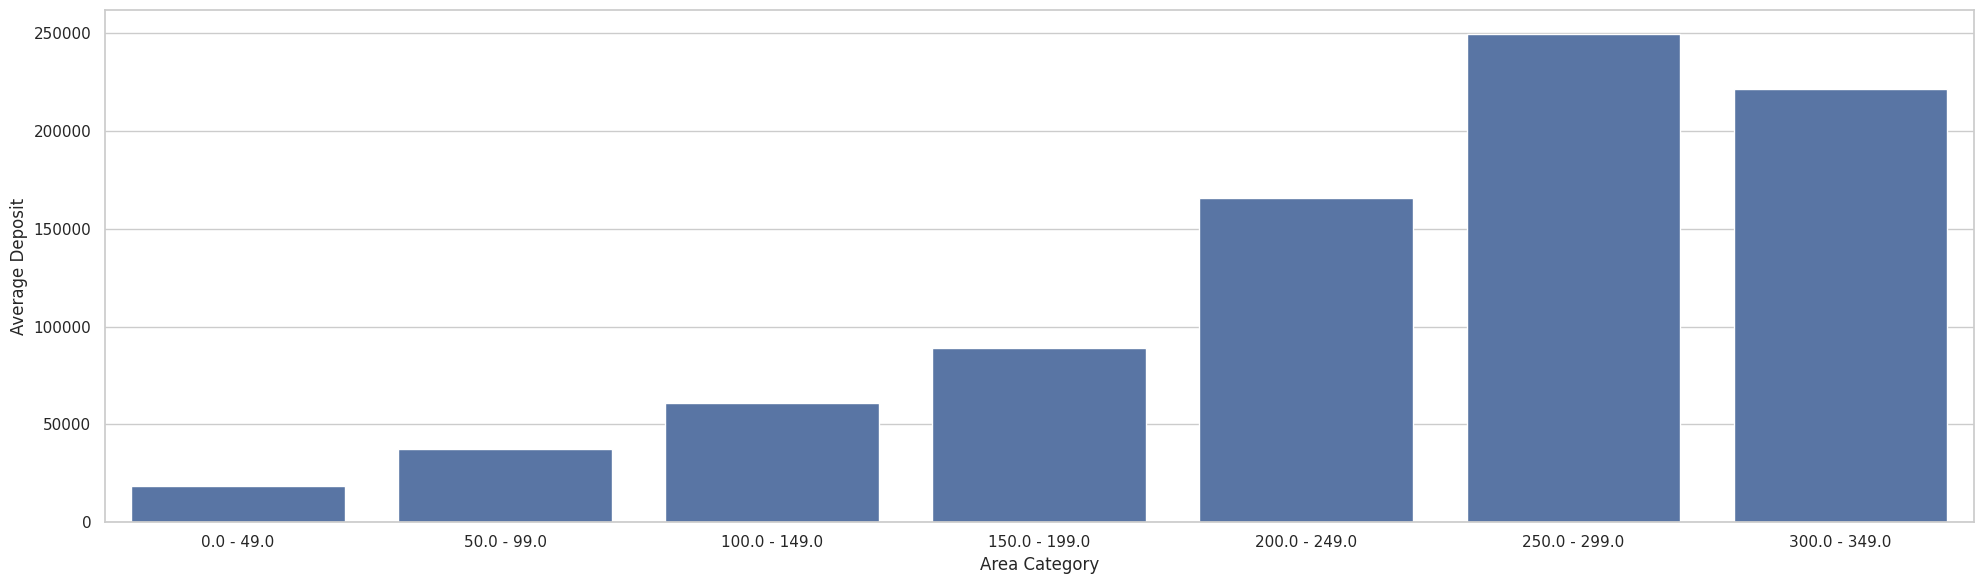

In [84]:
train_data['area_m2_category'] = train_data['area_m2'].apply(categorize_area)


category_means = train_data.groupby('area_m2_category')['deposit'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='area_m2_category', y='deposit', data=category_means, order=['0.0 - 49.0','50.0 - 99.0','100.0 - 149.0','150.0 - 199.0','200.0 - 249.0','250.0 - 299.0', '300.0 - 349.0'])
plt.xlabel('Area Category')
plt.ylabel('Average Deposit')
plt.tight_layout()
plt.show()

In [86]:

max_deposit_row = train_data.loc[train_data['deposit'].idxmax()]
min_deposit_row = train_data.loc[train_data['deposit'].idxmin()]

print(max_deposit_row)
print(min_deposit_row)

index                        1406833
area_m2                       273.96
contract_year_month           202210
contract_day                      13
contract_type                      0
floor                             18
built_year                      2020
latitude                   37.525956
longitude                 127.054237
age                                2
deposit                    1100000.0
cluster                            7
area_100.0 - 149.0                 0
area_150.0 - 199.0                 0
area_200.0 - 249.0                 0
area_250.0 - 299.0                 1
area_300.0 - 349.0                 0
area_50.0 - 99.0                   0
area_m2_category       250.0 - 299.0
Name: 1406833, dtype: object
index                       65548
area_m2                     47.25
contract_year_month        201910
contract_day                   22
contract_type                   2
floor                           5
built_year                   1987
latitude                37.013

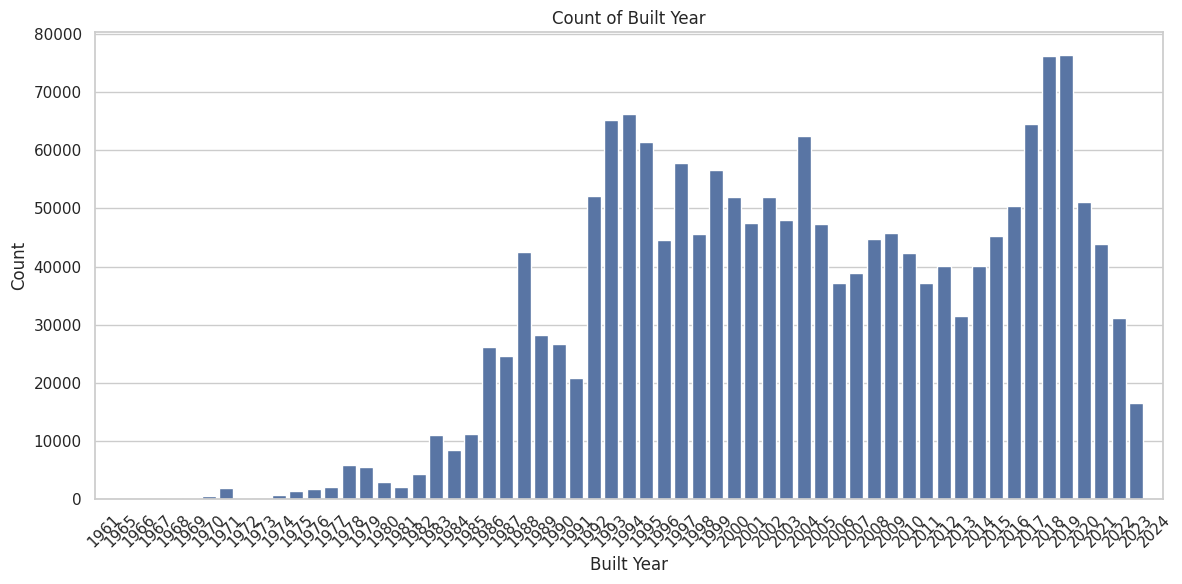

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='built_year', order=sorted(train_data['built_year'].unique()))
plt.title('Count of Built Year')
plt.xlabel('Built Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
unique_train = train_data[["latitude", "longitude"]].drop_duplicates().reset_index(drop=True)

unique_train.shape

(18491, 2)

In [16]:
from sklearn.neighbors import BallTree

seoul_area_school = schoolinfo[(schoolinfo['latitude'] >= 37.0) & (schoolinfo['latitude'] <= 38.0) &
                                (schoolinfo['longitude'] >= 126.0) & (schoolinfo['longitude'] <= 128.0)]

elementary_schools = seoul_area_school[seoul_area_school['schoolLevel'] == 'elementary']
middle_schools = seoul_area_school[seoul_area_school['schoolLevel'] == 'middle']
high_schools = seoul_area_school[seoul_area_school['schoolLevel'] == 'high']

# 각 학교 유형에 대해 BallTree 생성
elementary_tree = BallTree(np.radians(elementary_schools[['latitude', 'longitude']]), metric='haversine')
middle_tree = BallTree(np.radians(middle_schools[['latitude', 'longitude']]), metric='haversine')
high_tree = BallTree(np.radians(high_schools[['latitude', 'longitude']]), metric='haversine')

# 거리 계산 함수 정의
def calculate_distances(data):
    # 중복 제거
    unique_coords = data[['latitude', 'longitude']].drop_duplicates().reset_index(drop=True)
    house_coords = np.radians(unique_coords.values)

    # 가장 가까운 학교까지의 거리 계산 (미터 단위로 변환)
    unique_coords['nearest_elementary_distance'] = elementary_tree.query(house_coords, k=1)[0].flatten() * 6371000
    unique_coords['nearest_middle_distance'] = middle_tree.query(house_coords, k=1)[0].flatten() * 6371000
    unique_coords['nearest_high_distance'] = high_tree.query(house_coords, k=1)[0].flatten() * 6371000

    data = data.merge(unique_coords, on=['latitude', 'longitude'], how='left')
    
    return data

train_data = calculate_distances(train_data)


In [17]:
train_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,nearest_elementary_distance,nearest_middle_distance,nearest_high_distance
count,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06
mean,9.006135e+05,7.518833e+01,2.021331e+05,1.589943e+01,1.203805e+00,1.005197e+01,2.004199e+03,3.747721e+01,1.269662e+02,1.706597e+01,3.816223e+04,3.501158e+02,5.496963e+02,7.077997e+02
std,5.199699e+05,2.552632e+01,1.352815e+02,8.625998e+00,8.852792e-01,6.973359e+00,1.115132e+01,1.625113e-01,1.701221e-01,1.112796e+01,2.610377e+04,3.137910e+02,4.781497e+02,6.061116e+02
min,0.000000e+00,1.032150e+01,2.019040e+05,1.000000e+00,0.000000e+00,-4.000000e+00,1.961000e+03,3.691791e+01,1.264787e+02,-3.000000e+00,3.000000e+02,2.051722e+01,1.577725e+01,2.096447e+01
25%,4.503068e+05,5.975000e+01,2.020080e+05,9.000000e+00,0.000000e+00,5.000000e+00,1.995000e+03,3.737976e+01,1.268422e+02,7.000000e+00,2.100000e+04,2.065667e+02,2.917733e+02,3.608494e+02
50%,9.006135e+05,7.715000e+01,2.021110e+05,1.600000e+01,2.000000e+00,9.000000e+00,2.004000e+03,3.750227e+01,1.269976e+02,1.700000e+01,3.200000e+04,2.993855e+02,4.588902e+02,5.809024e+02
75%,1.350920e+06,8.496000e+01,2.022120e+05,2.300000e+01,2.000000e+00,1.400000e+01,2.015000e+03,3.758205e+01,1.270888e+02,2.600000e+01,4.780000e+04,4.109127e+02,6.701310e+02,8.824785e+02
max,1.801227e+06,3.173600e+02,2.023120e+05,3.100000e+01,2.000000e+00,6.800000e+01,2.024000e+03,3.818194e+01,1.276609e+02,6.200000e+01,1.100000e+06,2.061917e+04,2.327362e+04,2.834350e+04


In [25]:
unique_subwayInfo = subwayInfo.drop_duplicates().reset_index(drop=True)

unique_subwayInfo.shape

(583, 2)

In [26]:
duplicates = subwayInfo[subwayInfo.duplicated(keep=False)]
print(duplicates)

      latitude   longitude
2    37.529849  126.964561
3    37.514219  126.942454
6    37.508725  126.891295
7    37.589460  127.057583
10   37.623632  127.061835
..         ...         ...
679  37.508336  126.720548
681  37.489493  126.724805
684  37.457405  126.702221
690  37.412603  126.687389
698  37.399907  126.630347

[216 rows x 2 columns]


In [29]:
duplicates_count = subwayInfo.groupby(subwayInfo.columns.tolist()).size().reset_index(name='count')

duplicates = duplicates_count[duplicates_count['count'] == 3]

print(duplicates)

      latitude   longitude  count
241  37.504810  127.004943      3
371  37.557192  126.925381      3
394  37.565138  127.007896      3
416  37.571607  126.991806      3
422  37.575297  127.025087      3
425  37.576646  126.900984      3
444  37.589460  127.057583      3
453  37.596362  127.085032      3


In [34]:
# 환승역 가중치 부여
duplicate_stations = subwayInfo.groupby(['latitude', 'longitude']).size().reset_index(name='counts')
transfer_stations = duplicate_stations[duplicate_stations['counts'] > 1]

subwayInfo = subwayInfo.merge(transfer_stations[['latitude', 'longitude', 'counts']], 
                                on=['latitude', 'longitude'], 
                                how='left')
subwayInfo['weight'] = subwayInfo['counts'].fillna(1)  # 환승역은 가중치 > 1, 나머지는 1

subway_tree = BallTree(np.radians(subwayInfo[['latitude', 'longitude']]), metric='haversine')

# 거리 계산 함수 정의
def add_weighted_subway_distance(data):
    unique_coords = data[['latitude', 'longitude']].drop_duplicates().reset_index(drop=True)
    house_coords = np.radians(unique_coords.values)

    distances, indices = subway_tree.query(house_coords, k=1) 
    unique_coords['nearest_subway_distance'] = distances.flatten() * 6371000

    weights = subwayInfo.iloc[indices.flatten()]['weight'].values
    # 거리를 가중치로 나누기
    unique_coords['nearest_subway_distance'] /= weights
    
    data = data.merge(unique_coords, on=['latitude', 'longitude'], how='left')

    return data

train_data = add_weighted_subway_distance(train_data)

train_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,nearest_elementary_distance,nearest_middle_distance,nearest_high_distance,nearest_subway_distance
count,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06
mean,9.006135e+05,7.518833e+01,2.021331e+05,1.589943e+01,1.203805e+00,1.005197e+01,2.004199e+03,3.747721e+01,1.269662e+02,1.706597e+01,3.816223e+04,3.501158e+02,5.496963e+02,7.077997e+02,1.360350e+03
std,5.199699e+05,2.552632e+01,1.352815e+02,8.625998e+00,8.852792e-01,6.973359e+00,1.115132e+01,1.625113e-01,1.701221e-01,1.112796e+01,2.610377e+04,3.137910e+02,4.781497e+02,6.061116e+02,2.100679e+03
min,0.000000e+00,1.032150e+01,2.019040e+05,1.000000e+00,0.000000e+00,-4.000000e+00,1.961000e+03,3.691791e+01,1.264787e+02,-3.000000e+00,3.000000e+02,2.051722e+01,1.577725e+01,2.096447e+01,1.515038e+01
25%,4.503068e+05,5.975000e+01,2.020080e+05,9.000000e+00,0.000000e+00,5.000000e+00,1.995000e+03,3.737976e+01,1.268422e+02,7.000000e+00,2.100000e+04,2.065667e+02,2.917733e+02,3.608494e+02,3.765692e+02
50%,9.006135e+05,7.715000e+01,2.021110e+05,1.600000e+01,2.000000e+00,9.000000e+00,2.004000e+03,3.750227e+01,1.269976e+02,1.700000e+01,3.200000e+04,2.993855e+02,4.588902e+02,5.809024e+02,6.822626e+02
75%,1.350920e+06,8.496000e+01,2.022120e+05,2.300000e+01,2.000000e+00,1.400000e+01,2.015000e+03,3.758205e+01,1.270888e+02,2.600000e+01,4.780000e+04,4.109127e+02,6.701310e+02,8.824785e+02,1.358392e+03
max,1.801227e+06,3.173600e+02,2.023120e+05,3.100000e+01,2.000000e+00,6.800000e+01,2.024000e+03,3.818194e+01,1.276609e+02,6.200000e+01,1.100000e+06,2.061917e+04,2.327362e+04,2.834350e+04,2.628670e+04
